In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

Remplir la table reflist

In [2]:
ref1 = pd.read_csv('/home/kencapoche/Téléchargements/data_anonymous/reflist_6.olpn', sep=',')

In [3]:
ref1.head()

,Unnamed: 0,Epc
0,0,epc_106
1,1,epc_107
2,2,epc_108
3,3,epc_109
4,4,epc_110


In [4]:

pathfile = r'data_anonymous/'

# reflist: list of epc in each box
reflist = pd.DataFrame()
# 
files=os.listdir(pathfile)
for file in files:
    print(file)
    if file.startswith('reflist_'):
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',').reset_index(drop=True)[['Epc']]
        temp['refListId']=file.split('.')[0]
        reflist = pd.concat([reflist, temp], axis = 0)
        #reflist=reflist.append(temp)
reflist=reflist.rename(columns = {'refListId':'refListId_actual'})
reflist['refListId_actual'] = reflist['refListId_actual'].apply(lambda x:int(x[8:]))

Q_refListId_actual=reflist.groupby('refListId_actual')['Epc'].nunique().rename('Q refListId_actual').reset_index(drop=False)
reflist=pd.merge(reflist,Q_refListId_actual,on='refListId_actual',how='left')
reflist.head()

reflist_3.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-19_20_14.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
ano_supply-process.2019-11-07-CUT.csv
reflist_7.olpn
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
reflist_8.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
reflist_1.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
.ipynb_checkpoints
reflist_6.olpn
reflist_0.olpn
reflist_4.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv
reflist_5.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
reflist_2.olpn
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
reflist_9.olpn
ano_APTag

,Epc,refListId_actual,Q refListId_actual
0,epc_182,3,10
1,epc_183,3,10
2,epc_184,3,10
3,epc_185,3,10
4,epc_186,3,10


In [5]:
# pathfile=r'data_anonymous'
# 
# df : rfid readings
df=pd.DataFrame()
# 
#files=os.listdir(pathfile)
for file in files:
    if file.startswith('ano_APTags'):
        print(file)
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',')
        df= pd.concat([df, temp], axis = 0)
df['LogTime'] = pd.to_datetime (df['LogTime'] ,format='%Y-%m-%d-%H:%M:%S') 
df['TimeStamp'] = df['TimeStamp'].astype(float)
df['Rssi'] = df['Rssi'].astype(float)
df=df.drop(['Reader','EmitPower','Frequency'],axis=1).reset_index(drop=True)
df=df[['LogTime', 'Epc', 'Rssi', 'Ant']]
# antennas 1 and 2 are facing the box when photocell in/out 
Ant_loc=pd.DataFrame({'Ant':[1,2,3,4],'loc':['in','in','out','out']})
df=pd.merge(df,Ant_loc,on=['Ant'])
df=df.sort_values('LogTime').reset_index(drop=True)

tags = df


ano_APTags-TagsAutomatedProcess-2019-11-07-19_20_14.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_00_26.csv


In [6]:
# timing: photocells a time window for each box: start/stop (ciuchStart, ciuchStop)
file=r'ano_supply-process.2019-11-07-CUT.csv'
timing=pd.read_csv(os.path.join(pathfile,file),sep=',')
timing['file']=file
timing['date']=pd.to_datetime(timing['date'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStart']=pd.to_datetime(timing['ciuchStart'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStop']=pd.to_datetime(timing['ciuchStop'],format='%d/%m/%Y %H:%M:%S,%f')
timing['timestampStart']=timing['timestampStart'].astype(float)
timing['timestampStop']=timing['timestampStop'].astype(float)
timing=timing.sort_values('date')
timing.loc[:,'refListId']=timing.loc[:,'refListId'].apply(lambda x:int(x[8:]))
timing=timing[['refListId', 'ciuchStart', 'ciuchStop']]
timing[:1]

,refListId,ciuchStart,ciuchStop
0,0,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197


In [7]:
len(timing),len(reflist)

(389, 202)

In [8]:
timing[:12]

,refListId,ciuchStart,ciuchStop
0,0,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197
1,1,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463
2,2,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447
3,3,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591
4,4,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528
5,5,2019-11-07 18:54:29.422,2019-11-07 18:54:31.278
6,6,2019-11-07 18:54:34.953,2019-11-07 18:54:36.685
7,7,2019-11-07 18:54:40.829,2019-11-07 18:54:42.611
8,8,2019-11-07 18:54:46.383,2019-11-07 18:54:48.158
9,9,2019-11-07 18:54:52.122,2019-11-07 18:54:54.051


In [9]:
# ciuchStart_up starts upstream ciuchStart, half way in between the previous stop and the actual start
timing[['ciuchStop_last']]=timing[['ciuchStop']].shift(1)
timing[['refListId_last']]=timing[['refListId']].shift(1)
timing['ciuchStartup']=timing['ciuchStart'] - (timing['ciuchStart'] - timing['ciuchStop_last'])/2
# timing start: 10sec before timing
timing.loc[0,'refListId_last']=timing.loc[0,'refListId']
timing.loc[0,'ciuchStartup']=timing.loc[0,'ciuchStart']-datetime.timedelta(seconds=10)
timing.loc[0,'ciuchStop_last']=timing.loc[0,'ciuchStartup']-datetime.timedelta(seconds=10)
timing['refListId_last']=timing['refListId_last'].astype(int)
# 
timing['ciuchStopdown']= timing['ciuchStartup'].shift(-1)
timing.loc[len(timing)-1,'ciuchStopdown']=timing.loc[len(timing)-1,'ciuchStop']+datetime.timedelta(seconds=10)
timing=timing[['refListId', 'refListId_last','ciuchStartup', 'ciuchStart','ciuchStop','ciuchStopdown']]
timing.head()

,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown
0,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000
1,1,0,2019-11-07 18:53:58.417000,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.025000
2,2,1,2019-11-07 18:54:09.025000,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500
3,3,2,2019-11-07 18:54:16.694500,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.637000
4,4,3,2019-11-07 18:54:21.637000,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000


In [10]:
# box 0 always starts
timing[timing['refListId']==0].head()

,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown
0,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000
10,0,9,2019-11-07 18:54:55.894500,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765000
20,0,9,2019-11-07 18:55:53.460500,2019-11-07 18:55:55.497,2019-11-07 18:55:57.377,2019-11-07 18:55:59.567500
30,0,9,2019-11-07 18:56:51.317000,2019-11-07 18:56:53.344,2019-11-07 18:56:55.215,2019-11-07 18:56:57.241500
40,0,9,2019-11-07 18:58:02.390500,2019-11-07 18:58:04.351,2019-11-07 18:58:06.212,2019-11-07 18:58:11.428000


In [11]:
# t0_run = a new run starts when box 0 shows up
t0_run=timing[timing['refListId']==0] [['ciuchStartup']]
t0_run=t0_run.rename(columns={'ciuchStartup':'t0_run'})
t0_run=t0_run.groupby('t0_run').size().cumsum().rename('run').reset_index(drop=False)
t0_run=t0_run.sort_values('t0_run')
# 
# each row in timing is merged with a last row in t0_run where t0_run (ciuchstart) <= timing (ciuchstart)
timing=pd.merge_asof(timing,t0_run,left_on='ciuchStartup',right_on='t0_run', direction='backward')
timing=timing.sort_values('ciuchStop')
timing=timing[['run', 'refListId', 'refListId_last', 'ciuchStartup','ciuchStart','ciuchStop','ciuchStopdown','t0_run']]


In [12]:
t0_run=t0_run.groupby('t0_run').size()
t0_run

t0_run
2019-11-07 18:53:42.370000    1
2019-11-07 18:54:55.894500    1
2019-11-07 18:55:53.460500    1
2019-11-07 18:56:51.317000    1
2019-11-07 18:58:02.390500    1
2019-11-07 18:59:12.578000    1
2019-11-07 19:00:11.355000    1
2019-11-07 19:01:08.444500    1
2019-11-07 19:02:06.147000    1
2019-11-07 19:03:30.097500    1
2019-11-07 19:04:33.341500    1
2019-11-07 19:06:02.905000    1
2019-11-07 19:07:01.380000    1
2019-11-07 19:07:58.760000    1
2019-11-07 19:08:56.508500    1
2019-11-07 19:10:03.165500    1
2019-11-07 19:11:04.105500    1
2019-11-07 19:12:01.748000    1
2019-11-07 19:13:08.821000    1
2019-11-07 19:14:16.076000    1
2019-11-07 19:15:20.144000    1
2019-11-07 19:16:17.873500    1
2019-11-07 19:17:38.018500    1
2019-11-07 19:18:41.470500    1
2019-11-07 19:19:38.848500    1
2019-11-07 19:20:36.336500    1
2019-11-07 19:21:34.041500    1
2019-11-07 19:22:31.389500    1
2019-11-07 19:23:29.135000    1
2019-11-07 19:24:26.671500    1
2019-11-07 19:25:24.099500    1
2

In [13]:
timing[:12]

,run,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000,2019-11-07 18:53:42.370000
1,1,1,0,2019-11-07 18:53:58.417000,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.025000,2019-11-07 18:53:42.370000
2,1,2,1,2019-11-07 18:54:09.025000,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500,2019-11-07 18:53:42.370000
3,1,3,2,2019-11-07 18:54:16.694500,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.637000,2019-11-07 18:53:42.370000
4,1,4,3,2019-11-07 18:54:21.637000,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000,2019-11-07 18:53:42.370000
5,1,5,4,2019-11-07 18:54:27.475000,2019-11-07 18:54:29.422,2019-11-07 18:54:31.278,2019-11-07 18:54:33.115500,2019-11-07 18:53:42.370000
6,1,6,5,2019-11-07 18:54:33.115500,2019-11-07 18:54:34.953,2019-11-07 18:54:36.685,2019-11-07 18:54:38.757000,2019-11-07 18:53:42.370000
7,1,7,6,2019-11-07 18:54:38.757000,2019-11-07 18:54:40.829,2019-11-07 18:54:42.611,2019-11-07 18:54:44.497000,2019-11-07 18:53:42.370000
8,1,8,7,2019-11-07 18:54:44.497000,2019-11-07 18:54:46.383,2019-11-07 18:54:48.158,2019-11-07 18:54:50.140000,2019-11-07 18:53:42.370000
9,1,9,8,2019-11-07 18:54:50.140000,2019-11-07 18:54:52.122,2019-11-07 18:54:54.051,2019-11-07 18:54:55.894500,2019-11-07 18:53:42.370000


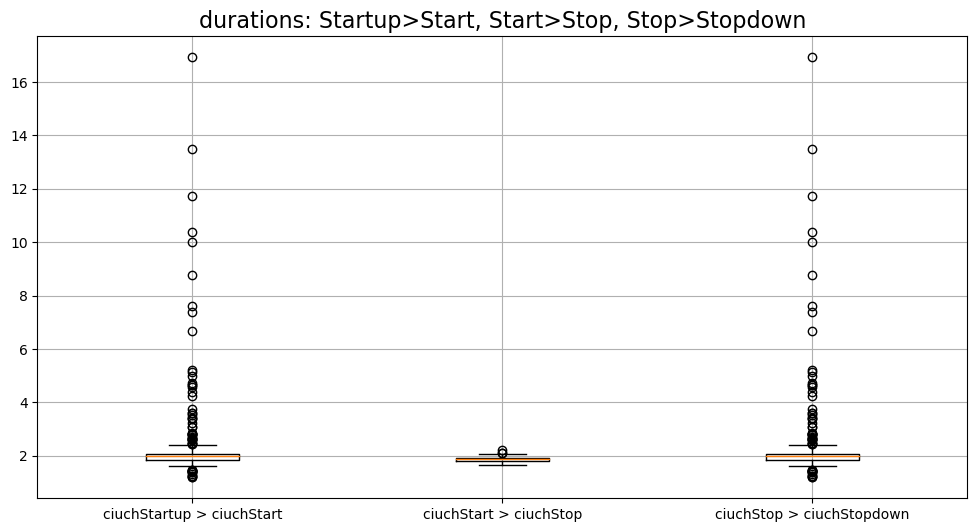

In [14]:
plt.figure(figsize=(12,6))
up=(timing['ciuchStart']-timing['ciuchStartup']).apply(lambda x:x.total_seconds())
mid=(timing['ciuchStop']-timing['ciuchStart']).apply(lambda x:x.total_seconds())
down=(timing['ciuchStopdown']-timing['ciuchStop']).apply(lambda x:x.total_seconds())
plt.boxplot([up,mid,down],labels=['ciuchStartup > ciuchStart','ciuchStart > ciuchStop','ciuchStop > ciuchStopdown'])
plt.grid()
plt.title('durations: Startup>Start, Start>Stop, Stop>Stopdown',size=16)
plt.show()

In [15]:
#  full window (ciuchStartup > ciuchStopdown) is sliced in smaller slices
# ciuchStartup > ciuchStart: 11 slices named up_0, up_1, ..., up_10
# ciuchStart > ciuchStop: 11 slices named mid_0, mid_1, ... mid_10
# ciuchStop > ciuchStopdown: 11 slices names down_0, down_1, ... down_10

slices = pd.DataFrame()
for i, row in timing.iterrows():
    ciuchStartup = row['ciuchStartup']
    ciuchStart = row['ciuchStart']
    ciuchStop = row['ciuchStop']
    ciuchStopdown = row['ciuchStopdown']
    steps = 3

    # Création des tranches "up"
    up = pd.DataFrame(index=pd.date_range(start=ciuchStartup, end=ciuchStart, periods=steps)) \
        .reset_index(drop=False).rename(columns={'index': 'slice'})
    up['slice_id'] = ['up_' + str(x) for x in range(steps)]
    slices = pd.concat([slices, up], ignore_index=True)

    # Création des tranches "mid"
    mid = pd.DataFrame(index=pd.date_range(start=ciuchStart, end=ciuchStop, periods=steps)) \
        .reset_index(drop=False).rename(columns={'index': 'slice'})
    mid['slice_id'] = ['mid_' + str(x) for x in range(steps)]
    slices = pd.concat([slices, mid], ignore_index=True)

    # Création des tranches "down"
    down = pd.DataFrame(index=pd.date_range(start=ciuchStop, end=ciuchStopdown, periods=steps)) \
        .reset_index(drop=False).rename(columns={'index': 'slice'})
    down['slice_id'] = ['down_' + str(x) for x in range(steps)]
    slices = pd.concat([slices, down], ignore_index=True)

slices.reset_index(drop=False, inplace=True)

# 
timing_slices=pd.merge_asof(slices,timing,left_on='slice',right_on='ciuchStartup',direction='backward')
timing_slices=timing_slices[['run', 'refListId', 'refListId_last','slice_id','slice',  \
                             'ciuchStartup', 'ciuchStart', 'ciuchStop', 'ciuchStopdown','t0_run']]
timing_slices.head()

,run,refListId,refListId_last,slice_id,slice,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,up_0,2019-11-07 18:53:42.370000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
1,1,0,0,up_1,2019-11-07 18:53:47.370000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
2,1,0,0,up_2,2019-11-07 18:53:52.370000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
3,1,0,0,mid_0,2019-11-07 18:53:52.370000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
4,1,0,0,mid_1,2019-11-07 18:53:53.283500,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370


In [16]:
len(timing_slices)

3501

In [17]:
# merge between df and timing
# merge_asof needs sorted df > df_ref
df=df[ (df['LogTime']>=timing['ciuchStartup'].min()) & (df['LogTime']<=timing['ciuchStopdown'].max())  ]
df=df.sort_values('LogTime')
# 
# each row in df_ref is merged with the last row in timing where timing (ciuchstart_up) < df_ref (logtime)
# 
# df_timing=pd.merge_asof(df_ref,timing,left_on=['LogTime'],right_on=['ciuchStartup'],direction='backward')
# df_timing=df_timing.dropna()
# df_timing=df_timing.sort_values('LogTime').reset_index(drop=True)
# df_timing=df_timing[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup',\
#                      'LogTime', 'ciuchStop', 'ciuchStopdown','Rssi', 'loc', 'refListId_actual']]
# 
# each row in df_ref is merged with the last row in timing_slices where timing (slice) < df_ref (logtime)
# 
df_timing_slices=pd.merge_asof(df,timing_slices,left_on=['LogTime'],right_on=['slice'],direction='backward')
df_timing_slices=df_timing_slices.dropna()
df_timing_slices=df_timing_slices.sort_values('slice').reset_index(drop=True)
df_timing_slices=df_timing_slices[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup','slice_id','slice','LogTime', \
                      'ciuchStart','ciuchStop', 'ciuchStopdown', 'Rssi', 'loc','t0_run']]
df_timing_slices['reflist_run_id'] = df_timing_slices['refListId'].astype(str) +"_"+ df_timing_slices['run'].astype(str)
df_timing_slices

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,reflist_run_id
0,1,epc_130,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370,2019-11-07 18:53:43,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-73.0,in,2019-11-07 18:53:42.370,0_1
1,1,epc_139,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370,2019-11-07 18:53:46,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-63.0,out,2019-11-07 18:53:42.370,0_1
2,1,epc_137,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370,2019-11-07 18:53:46,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-60.0,in,2019-11-07 18:53:42.370,0_1
3,1,epc_132,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370,2019-11-07 18:53:46,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-68.0,in,2019-11-07 18:53:42.370,0_1
4,1,epc_130,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370,2019-11-07 18:53:46,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-68.0,in,2019-11-07 18:53:42.370,0_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356063,40,epc_160,1,0,2019-11-07 19:34:44.230,down_1,2019-11-07 19:34:53.639,2019-11-07 19:34:55,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-69.0,out,2019-11-07 19:34:37.679,1_40
356064,40,epc_187,1,0,2019-11-07 19:34:44.230,down_1,2019-11-07 19:34:53.639,2019-11-07 19:34:55,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-66.0,out,2019-11-07 19:34:37.679,1_40
356065,40,epc_188,1,0,2019-11-07 19:34:44.230,down_1,2019-11-07 19:34:53.639,2019-11-07 19:34:55,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-65.0,out,2019-11-07 19:34:37.679,1_40
356066,40,epc_189,1,0,2019-11-07 19:34:44.230,down_1,2019-11-07 19:34:53.639,2019-11-07 19:34:55,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-69.0,out,2019-11-07 19:34:37.679,1_40


In [18]:
# 

In [19]:
# df_timing_slices=pd.merge(df_timing_slices, reflist, on='Epc',how='left')
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) & (df_timing_slices['refListId_actual']==9)) ]
# # 
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==9) & (df_timing_slices['refListId_actual']==0)) ]
# # # 
# # df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) | (df_timing_slices['refListId_actual']==0)) ]

# df_timing_slices=df_timing_slices.drop(['refListId_actual','Q refListId_actual'],axis=1)

In [20]:
runs_out=df_timing_slices .groupby('run')['refListId'].nunique().rename('Q refListId').reset_index(drop=False)
runs_out[runs_out['Q refListId']!=10]

,run,Q refListId
15,16,9
22,23,9
31,32,9
39,40,2


In [21]:
current_last_windows=timing_slices.drop_duplicates(['run','refListId','refListId_last'])
current_last_windows=current_last_windows[['run','refListId','refListId_last','ciuchStop']].reset_index(drop=True)
current_last_windows[:1]

,run,refListId,refListId_last,ciuchStop
0,1,0,0,2019-11-07 18:53:54.197


In [22]:
# runs 16 23 32 40 have missing boxes: discarded
# also run 1 is the start, no previous box: discarded
# run 18: box 0 run at the end
# 
timing=timing[~timing['run'].isin([1,18,16,23,32,40])]
timing_slices=timing_slices[~timing_slices['run'].isin([1,18,16,23,32,40])]
df_timing_slices=df_timing_slices[~df_timing_slices['run'].isin([1,18,16,23,32,40])]

df_timing_slices=df_timing_slices.sort_values(['LogTime','Epc'])
# 

In [23]:
len(timing),len(timing_slices), len(df_timing_slices)

(340, 3060, 307965)

In [24]:
df_timing_slices[:1]

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,reflist_run_id
8995,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-47.0,out,2019-11-07 18:54:55.894500,0_2


In [25]:
# df_timing_slices['dt']=
df_timing_slices['dt']=(df_timing_slices['LogTime']-df_timing_slices['t0_run']).apply(lambda x:x.total_seconds())

In [26]:
df_timing_slices[:1]

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,reflist_run_id,dt
8995,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-47.0,out,2019-11-07 18:54:55.894500,0_2,0.1055


In [27]:
# 
# df_timing_threshold
# 

In [28]:
rssi_threshold=-110
df_timing_slices_threshold=df_timing_slices[df_timing_slices['Rssi']>rssi_threshold]

In [29]:
# readrate
# readrate
round(100*df_timing_slices_threshold.reset_index(drop=False).groupby(['run','loc'])['Epc'].nunique().groupby('loc').mean()\
    /reflist['Epc'].nunique(),2)

loc
in     100.00
out     99.29
Name: Epc, dtype: float64

In [30]:
reflist.head()

,Epc,refListId_actual,Q refListId_actual
0,epc_182,3,10
1,epc_183,3,10
2,epc_184,3,10
3,epc_185,3,10
4,epc_186,3,10


In [31]:
#tags=df
#tags


In [32]:
timing.head()

,run,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
10,2,0,9,2019-11-07 18:54:55.894500,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765000,2019-11-07 18:54:55.894500
11,2,1,0,2019-11-07 18:55:01.765000,2019-11-07 18:55:03.946,2019-11-07 18:55:05.694,2019-11-07 18:55:07.694000,2019-11-07 18:54:55.894500
12,2,2,1,2019-11-07 18:55:07.694000,2019-11-07 18:55:09.694,2019-11-07 18:55:11.476,2019-11-07 18:55:13.452500,2019-11-07 18:54:55.894500
13,2,3,2,2019-11-07 18:55:13.452500,2019-11-07 18:55:15.429,2019-11-07 18:55:17.273,2019-11-07 18:55:19.106000,2019-11-07 18:54:55.894500
14,2,4,3,2019-11-07 18:55:19.106000,2019-11-07 18:55:20.939,2019-11-07 18:55:22.679,2019-11-07 18:55:24.862500,2019-11-07 18:54:55.894500


In [33]:
ana = df_timing_slices.groupby(['Epc', 'reflist_run_id', 'slice_id', 'loc']) ['Rssi'].max()\
.unstack('loc', fill_value =- 110).reset_index(drop=False)

order=pd.DataFrame(timing_slices['slice_id'].unique(), columns=['slice_id'])
order['order']=order. index

ana=pd.merge(ana, order, on='slice_id', how='left')
ana = ana [['Epc', 'reflist_run_id', 'slice_id', 'in', 'out', 'order']]
# Last subslice_id with out>in
ana_out =ana [ ana['out']>ana['in'] ] \
.sort_values(['Epc', 'reflist_run_id', 'order'], ascending=False) \
.drop_duplicates(['Epc', 'reflist_run_id'])
# first subslice_id with in/out
ana_in =ana [ ana['in']>ana['out'] ] \
.sort_values(['Epc', 'reflist_run_id', 'order'], ascending=True) \
.drop_duplicates(['Epc', 'reflist_run_id'])

ana = pd.merge(ana_in, ana_out, on=['Epc', 'reflist_run_id'], suffixes=['_IN', '_OUT'], how='inner')\
.sort_values(['Epc', 'reflist_run_id'])
ana = pd.merge(ana, reflist, on='Epc', how='left')


ana['refListId_actual']

0       5
1       5
2       5
3       5
4       5
       ..
6502    0
6503    0
6504    0
6505    0
6506    0
Name: refListId_actual, Length: 6507, dtype: int64

In [34]:
def analytical(df_timing_slices, timing_slices):
    
    
    ana = df_timing_slices.groupby(['Epc', 'reflist_run_id', 'slice_id', 'loc']) ['Rssi'].max()\
    .unstack('loc', fill_value =- 110).reset_index(drop=False)

    order=pd.DataFrame(timing_slices['slice_id'].unique(), columns=['slice_id'])
    order['order']=order. index

    ana=pd.merge(ana, order, on='slice_id', how='left')
    ana = ana [['Epc', 'reflist_run_id', 'slice_id', 'in', 'out', 'order']]
    # Last subslice_id with out>in
    ana_out =ana [ ana['out']>ana['in'] ] \
    .sort_values(['Epc', 'reflist_run_id', 'order'], ascending=False) \
    .drop_duplicates(['Epc', 'reflist_run_id'])
    # first subslice_id with in/out
    ana_in =ana [ ana['in']>ana['out'] ] \
    .sort_values(['Epc', 'reflist_run_id', 'order'], ascending=True) \
    .drop_duplicates(['Epc', 'reflist_run_id'])

    ana = pd.merge(ana_in, ana_out, on=['Epc', 'reflist_run_id'], suffixes=['_IN', '_OUT'], how='inner')\
    .sort_values(['Epc', 'reflist_run_id'])
    ana = pd.merge(ana, reflist, on='Epc', how='left')

    ana['pred_ana_bool']= ana['reflist_run_id'].apply(lambda x:x.split('_')[0]).astype('int64') == ana['refListId_actual']

    return ana



analytical(df_timing_slices, timing_slices)


,Epc,reflist_run_id,slice_id_IN,in_IN,out_IN,order_IN,slice_id_OUT,in_OUT,out_OUT,order_OUT,refListId_actual,Q refListId_actual,pred_ana_bool
0,epc_0,5_10,up_1,-51.0,-110.0,2,up_0,-110.0,-47.0,1,5,40,True
1,epc_0,5_11,up_1,-49.0,-69.0,2,up_0,-63.0,-47.0,1,5,40,True
2,epc_0,5_12,up_1,-56.0,-63.0,2,up_0,-110.0,-46.0,1,5,40,True
3,epc_0,5_13,up_1,-50.0,-110.0,2,up_0,-64.0,-45.0,1,5,40,True
4,epc_0,5_14,mid_0,-51.0,-110.0,4,up_1,-67.0,-47.0,2,5,40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,epc_99,0_7,up_1,-51.0,-62.0,2,up_0,-55.0,-49.0,1,0,16,True
6503,epc_99,0_8,up_1,-52.0,-60.0,2,up_0,-61.0,-48.0,1,0,16,True
6504,epc_99,0_9,up_1,-44.0,-61.0,2,up_0,-59.0,-48.0,1,0,16,True
6505,epc_99,1_14,up_1,-61.0,-110.0,2,up_0,-63.0,-62.0,1,0,16,False


<h4> Evaluation de la méthode analytique</h4>

In [35]:
analytics = analytical(df_timing_slices, timing_slices)
trues, total = analytics[analytics['pred_ana_bool']==True].shape[0], analytics.shape[0]
trues, total

(6318, 6507)

In [36]:
accur = 100 * trues/total
accur

97.0954356846473

Nombre de tags trouvés par carton

In [37]:
cartons = analytics[['reflist_run_id','refListId_actual','Q refListId_actual', 'pred_ana_bool']]
cartons['n_true'] = cartons['pred_ana_bool'].astype(int)
cartons.loc[:10]

/tmp/ipykernel_73617/2228560708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cartons['n_true'] = cartons['pred_ana_bool'].astype(int)


,reflist_run_id,refListId_actual,Q refListId_actual,pred_ana_bool,n_true
0,5_10,5,40,True,1
1,5_11,5,40,True,1
2,5_12,5,40,True,1
3,5_13,5,40,True,1
4,5_14,5,40,True,1
5,5_15,5,40,True,1
6,5_17,5,40,True,1
7,5_19,5,40,True,1
8,5_2,5,40,True,1
9,5_20,5,40,True,1


In [38]:
cartons['run_id'] = cartons['reflist_run_id'].str.split('_').str[1]
#percent = cartons.groupby(['pred_box', 'Q refListId_actual'])['n_true'].sum()


/tmp/ipykernel_73617/836432174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cartons['run_id'] = cartons['reflist_run_id'].str.split('_').str[1]


In [39]:
pred1 = cartons[['refListId_actual','reflist_run_id','Q refListId_actual','n_true','run_id']].groupby(['refListId_actual','Q refListId_actual',])['n_true'].sum()
pred2 = cartons[['refListId_actual','run_id','pred_ana_bool']].groupby(['refListId_actual']).count()
#pred1.merge(pred2 on 


In [40]:
pred1 = pd.merge(pred2, pd.DataFrame(pred1), on = 'refListId_actual', how='inner')
pred1 = pred1.rename(columns={'run_id':'NbreTagsPourTousLesTours', 'n_true':'NbreBonnePredictions','pred_ana_bool':'pourcentage'})
pred1['pourcentage'] = 100*pred1['NbreBonnePredictions']/pred1['NbreTagsPourTousLesTours']
pred1

,NbreTagsPourTousLesTours,pourcentage,NbreBonnePredictions
refListId_actual,,,
0,513,98.830409,507
1,334,99.700599,333
2,1086,96.224678,1045
3,306,96.732026,296
4,346,97.976879,339
5,1241,97.663175,1212
6,794,97.984887,778
7,341,97.067449,331
8,1275,94.823529,1209


Statistiques par carton par Run

In [41]:
pred1 = cartons[['refListId_actual','reflist_run_id','Q refListId_actual','n_true','run_id']].groupby(['refListId_actual','Q refListId_actual','run_id'])['n_true'].sum()
pred2 = cartons[['refListId_actual','run_id','pred_ana_bool']].groupby(['refListId_actual','run_id']).count()
#pred1.merge(pred2 on 


In [42]:
result = pd.merge(pred2.rename(columns = {'reflist_run_id':'Total_tags_et_tour', 'pred_ana_bool':'Nombre de prédictions'}), \
                      pd.DataFrame(pred1), on = ['refListId_actual','run_id'], how='inner')

In [43]:
pd.DataFrame(pred1)

n_true
refListId_actual Q refListId_actual run_id        
0                16                 10          15
                                    11          14
                                    12          16
                                    13          14
                                    14          15
...                                            ...
9                8                  5            8
                                    6            7
                                    7            8
                                    8            7
                                    9            8

[339 rows x 1 columns]

In [44]:
pred2

pred_ana_bool
refListId_actual run_id               
0                10                 15
                 11                 14
                 12                 16
                 13                 16
                 14                 16
...                                ...
9                5                   8
                 6                   7
                 7                   9
                 8                   7
                 9                   8

[339 rows x 1 columns]

In [45]:
result.sort_values(by=['refListId_actual','run_id'], ascending=True).to_csv('resultats methode anaytique.csv')

In [46]:
timing['reflist_run_id']= timing['refListId'].astype(str)+"_"+ timing['run'].astype(str)
timing['window_width']=(timing['ciuchStopdown']-timing['ciuchStartup']).apply(lambda x:x.total_seconds())
windows=timing[['reflist_run_id', 'window_width']]
windows.head()

,reflist_run_id,window_width
10,0_2,5.8705
11,1_2,5.9290
12,2_2,5.7585
13,3_2,5.6535
14,4_2,5.7565


In [47]:
def dataset(df_timing_slices, windows, rssi_quantite):
    ds_rssi = df_timing_slices.groupby(['Epc', 'reflist_run_id', 'slice_id', 'loc'])['Rssi'].quantile(rssi_quantite) \
                 .unstack(['slice_id', 'loc'], fill_value=-110)
    ds_rssi.columns = [x[0] + '_' + x[1] for x in ds_rssi.columns]
    ds_rssi = ds_rssi.reset_index(drop=False)
    
    ds_rc = df_timing_slices.groupby(['Epc', 'reflist_run_id', 'slice_id', 'loc']).size() \
               .unstack(['slice_id', 'loc'], fill_value=0)
    ds_rc.columns = [x[0] + '_' + x[1] for x in ds_rc.columns]
    ds_rc = ds_rc.reset_index(drop=False)
    
    ds = pd.merge(ds_rssi, ds_rc, on=['Epc', 'reflist_run_id'], suffixes=['_rssi', '_rc'])
    ds = pd.merge(ds, windows, on='reflist_run_id', how='left')
    
    Q_Epcs_window = df_timing_slices.groupby(['reflist_run_id'])['Epc'].nunique().rename('Epcs_window').reset_index(drop=False)
    ds = pd.merge(ds, Q_Epcs_window, on='reflist_run_id', how='left')
    
    Q_reads_window = df_timing_slices.groupby(['reflist_run_id']).size().rename('reads_window').reset_index(drop=False)
    ds = pd.merge(ds, Q_reads_window, on='reflist_run_id', how='left')
    
    ds=pd.merge(ds, reflist, on='Epc', how='left')
    ds['actual']=ds['reflist_run_id'].apply(lambda x: x.split ('_')[0]).astype('int64')== ds['refListId_actual']
    ds['actual'] = ds ['actual'].replace({True: 'IN' , False: 'OUT'})

    
    return ds

dss = dataset(df_timing_slices, windows, 1)
dss
#a=dataset(df_timing_slices, windows , 1) [['Epc','reflist_run_id','refListId_actual','actual']]


,Epc,reflist_run_id,down_0_out_rssi,down_1_out_rssi,up_1_out_rssi,mid_0_out_rssi,mid_1_out_rssi,up_0_out_rssi,down_0_in_rssi,down_1_in_rssi,...,mid_0_in_rc,mid_1_in_rc,up_1_in_rc,up_0_in_rc,window_width,Epcs_window,reads_window,refListId_actual,Q refListId_actual,actual
0,epc_0,0_10,-67.0,-63.0,-64.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,11.4625,74,1526,5,40,OUT
1,epc_0,0_19,-69.0,-110.0,-110.0,-68.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,15.7040,72,2241,5,40,OUT
2,epc_0,0_21,-65.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,6.0845,71,897,5,40,OUT
3,epc_0,0_27,-69.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,5.8215,55,740,5,40,OUT
4,epc_0,0_29,-65.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,-110.0,...,0,0,0,0,5.7655,61,708,5,40,OUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24402,epc_99,9_5,-48.0,-50.0,-110.0,-110.0,-64.0,-110.0,-66.0,-66.0,...,0,0,0,0,6.7370,78,841,0,16,OUT
24403,epc_99,9_6,-47.0,-47.0,-59.0,-46.0,-43.0,-56.0,-62.0,-61.0,...,2,6,0,0,5.9590,70,831,0,16,OUT
24404,epc_99,9_7,-44.0,-47.0,-110.0,-63.0,-51.0,-110.0,-70.0,-63.0,...,0,0,0,0,5.7060,69,718,0,16,OUT
24405,epc_99,9_8,-46.0,-44.0,-110.0,-64.0,-56.0,-110.0,-68.0,-67.0,...,0,0,0,0,5.6160,63,674,0,16,OUT


In [48]:
dataset(df_timing_slices,windows, 1).groupby('actual')['Epc'].nunique()


actual
IN     202
OUT    202
Name: Epc, dtype: int64

In [49]:
colonne=dataset(df_timing_slices,windows,1).columns
colonne

Index(['Epc', 'reflist_run_id', 'down_0_out_rssi', 'down_1_out_rssi',
       'up_1_out_rssi', 'mid_0_out_rssi', 'mid_1_out_rssi', 'up_0_out_rssi',
       'down_0_in_rssi', 'down_1_in_rssi', 'mid_0_in_rssi', 'mid_1_in_rssi',
       'up_1_in_rssi', 'up_0_in_rssi', 'down_0_out_rc', 'down_1_out_rc',
       'up_1_out_rc', 'mid_0_out_rc', 'mid_1_out_rc', 'up_0_out_rc',
       'down_0_in_rc', 'down_1_in_rc', 'mid_0_in_rc', 'mid_1_in_rc',
       'up_1_in_rc', 'up_0_in_rc', 'window_width', 'Epcs_window',
       'reads_window', 'refListId_actual', 'Q refListId_actual', 'actual'],
      dtype='object')

In [50]:
Features=pd.DataFrame(\
    [\
     ['all', True, True, False, True, True, True],\
     ['rssi & rc only', True, True, False, False, False, False],\
     ['rssi & rc_mid', True, True, True, False, False, False],\
     ['rssi only', True, False, True, False, False, False],\
     ['rc only', False, True, False, False, False, False],\
    ], columns=['features', 'rssi', 'rc', 'rc_mid_only', 'Epcs_window', 'reads_window', 'window_width'])
Features

Features_temp = Features[Features['features']=='all']

X=[]
rssi = Features_temp ['rssi'].values[0]
X_rssi = [x for x in colonne if rssi*'rssi' in x.split('_')]
X_rssi

/tmp/ipykernel_73617/2151645350.py:15: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  X_rssi = [x for x in colonne if rssi*'rssi' in x.split('_')]


['down_0_out_rssi',
 'down_1_out_rssi',
 'up_1_out_rssi',
 'mid_0_out_rssi',
 'mid_1_out_rssi',
 'up_0_out_rssi',
 'down_0_in_rssi',
 'down_1_in_rssi',
 'mid_0_in_rssi',
 'mid_1_in_rssi',
 'up_1_in_rssi',
 'up_0_in_rssi']

In [51]:

def Xcols_func(features, Xcols_all):
    Features=pd.DataFrame(\
        [\
         ['all', True, True, False, True, True, True],\
         ['rssi & rc only', True, True, False, False, False, False],\
         ['rssi & rc_mid', True, True, True, False, False, False],\
         ['rssi only', True, False, True, False, False, False],\
         ['rc only', False, True, False, False, False, False],\
        ], columns=['features', 'rssi', 'rc', 'rc_mid_only', 'Epcs_window', 'reads_window', 'window_width'])
    Features

    Features_temp = Features[Features['features']==features]
    
    X=[]
    rssi = Features_temp ['rssi'].values[0]
    rc = Features_temp['rc'].values[0]
    rc_mid_only = Features_temp['rc_mid_only'].values[0]
    Epcs_window =  Features_temp['Epcs_window'].values[0]
    reads_window =  Features_temp['reads_window'].values[0]
    window_width =  Features_temp['window_width'].values[0]
    
    X_rssi = [x for x in colonne if rssi*'rssi' in x.split('_')]
    X_rc = [x for x in colonne if rc*'rc' in x.split('_')]
    
    X = X_rssi + X_rc
    
    if Epcs_window:
        X.append('Epcs_window')
    if reads_window:
        X.append('reads_window')
    if window_width:
        X.append('window_width')
        
    return X

In [52]:
Xcols_func('all',colonne)

/tmp/ipykernel_73617/2712153147.py:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  X_rssi = [x for x in colonne if rssi*'rssi' in x.split('_')]
/tmp/ipykernel_73617/2712153147.py:23: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  X_rc = [x for x in colonne if rc*'rc' in x.split('_')]


['down_0_out_rssi',
 'down_1_out_rssi',
 'up_1_out_rssi',
 'mid_0_out_rssi',
 'mid_1_out_rssi',
 'up_0_out_rssi',
 'down_0_in_rssi',
 'down_1_in_rssi',
 'mid_0_in_rssi',
 'mid_1_in_rssi',
 'up_1_in_rssi',
 'up_0_in_rssi',
 'down_0_out_rc',
 'down_1_out_rc',
 'up_1_out_rc',
 'mid_0_out_rc',
 'mid_1_out_rc',
 'up_0_out_rc',
 'down_0_in_rc',
 'down_1_in_rc',
 'mid_0_in_rc',
 'mid_1_in_rc',
 'up_1_in_rc',
 'up_0_in_rc',
 'Epcs_window',
 'reads_window',
 'window_width']

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ds=dataset(df_timing_slices, windows, 1)
X=ds[Xcols_func('rssi & rc only',colonne)]
ds['actual']=label_encoder.fit_transform(ds['actual'])
y=dataset(df_timing_slices, windows, 1)['actual']
y=ds['actual']
X
y

/tmp/ipykernel_73617/2712153147.py:22: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  X_rssi = [x for x in colonne if rssi*'rssi' in x.split('_')]
/tmp/ipykernel_73617/2712153147.py:23: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  X_rc = [x for x in colonne if rc*'rc' in x.split('_')]


0        1
1        1
2        1
3        1
4        1
        ..
24402    1
24403    1
24404    1
24405    1
24406    1
Name: actual, Length: 24407, dtype: int64

In [69]:
#Division des données en ensemble d'entraînement et de test
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
#Liste des valeurs de k à tester
k_values=list(range(1,20))
weight=['']


In [70]:
#Création de l'instance du classificateur KNN
knn=KNeighborsClassifier()
#Paramètres pour la recherche de grille
param_grid={'n_neighbors':k_values,'weights':}
#Recherche de grille avec validation croisée
grid_search=GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train,y_train)
#Extraction des scores de validation croisée et des valeurs de k correspondantes
cv_scores=grid_search.cv_results_['mean_test_score']
best_k=grid_search.best_params_['n_neighbors']
best_k

6

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score
best_model=grid_search.best_estimator_
#Prédivtion sur l'ensemble d'entraînement
y_train_pred=best_model.predict(X_train)
y_train_pred_proba=best_model.predict_proba(X_train)[:,1]

#Prédiction sur l'ensemble de test
y_test_pred=best_model.predict(X_test)
y_test_pred_proba=best_model.predict_proba(X_test)[:,1]

#Calcul de l'exactitude sur les ensembles d'entraînement et de test
accuracy_train=accuracy_score(y_train,y_train_pred)
accuracy_test=accuracy_score(y_test,y_test_pred)
print("Exactitude sur l'ensemble d'entraînement:{:.2f}%".format(accuracy_train*100))
print("Exactitude sur l'ensemble de test:{:.2f}%".format(accuracy_test*100))

sklearn.neighbors._classification.KNeighborsClassifier

In [77]:
def pretraitement_knn():
    
    pathfile = r'data_anonymous/'

    # reflist: list of epc in each box
    reflist = pd.DataFrame()
    # 
    files=os.listdir(pathfile)
    for file in files:
        if file.startswith('reflist_'):
            temp=pd.read_csv(os.path.join(pathfile,file),sep=',').reset_index(drop=True)[['Epc']]
            temp['refListId']=file.split('.')[0]
            reflist = pd.concat([reflist, temp], axis = 0)
            #reflist=reflist.append(temp)
    reflist=reflist.rename(columns = {'refListId':'refListId_actual'})
    reflist['refListId_actual'] = reflist['refListId_actual'].apply(lambda x:int(x[8:]))

    Q_refListId_actual=reflist.groupby('refListId_actual')['Epc'].nunique().rename('Q refListId_actual').reset_index(drop=False)
    reflist=pd.merge(reflist,Q_refListId_actual,on='refListId_actual',how='left')
    
    df=pd.DataFrame()
    # 
    #files=os.listdir(pathfile)
    for file in files:
        if file.startswith('ano_APTags'):
       
            temp=pd.read_csv(os.path.join(pathfile,file),sep=',')
            df= pd.concat([df, temp], axis = 0)
    df['LogTime'] = pd.to_datetime (df['LogTime'] ,format='%Y-%m-%d-%H:%M:%S') 
    df['TimeStamp'] = df['TimeStamp'].astype(float)
    df['Rssi'] = df['Rssi'].astype(float)
    df=df.drop(['Reader','EmitPower','Frequency'],axis=1).reset_index(drop=True)
    df=df[['LogTime', 'Epc', 'Rssi', 'Ant']]
    # antennas 1 and 2 are facing the box when photocell in/out 
    Ant_loc=pd.DataFrame({'Ant':[1,2,3,4],'loc':['in','in','out','out']})
    df=pd.merge(df,Ant_loc,on=['Ant'])
    df=df.sort_values('LogTime').reset_index(drop=True)

    tags = df

        # timing: photocells a time window for each box: start/stop (ciuchStart, ciuchStop)
    file=r'ano_supply-process.2019-11-07-CUT.csv'
    timing=pd.read_csv(os.path.join(pathfile,file),sep=',')
    timing['file']=file
    timing['date']=pd.to_datetime(timing['date'],format='%d/%m/%Y %H:%M:%S,%f')
    timing['ciuchStart']=pd.to_datetime(timing['ciuchStart'],format='%d/%m/%Y %H:%M:%S,%f')
    timing['ciuchStop']=pd.to_datetime(timing['ciuchStop'],format='%d/%m/%Y %H:%M:%S,%f')
    timing['timestampStart']=timing['timestampStart'].astype(float)
    timing['timestampStop']=timing['timestampStop'].astype(float)
    timing=timing.sort_values('date')
    timing.loc[:,'refListId']=timing.loc[:,'refListId'].apply(lambda x:int(x[8:]))
    timing=timing[['refListId', 'ciuchStart', 'ciuchStop']]
    
    
        # ciuchStart_up starts upstream ciuchStart, half way in between the previous stop and the actual start
    timing[['ciuchStop_last']]=timing[['ciuchStop']].shift(1)
    timing[['refListId_last']]=timing[['refListId']].shift(1)
    timing['ciuchStartup']=timing['ciuchStart'] - (timing['ciuchStart'] - timing['ciuchStop_last'])/2
    # timing start: 10sec before timing
    timing.loc[0,'refListId_last']=timing.loc[0,'refListId']
    timing.loc[0,'ciuchStartup']=timing.loc[0,'ciuchStart']-datetime.timedelta(seconds=10)
    timing.loc[0,'ciuchStop_last']=timing.loc[0,'ciuchStartup']-datetime.timedelta(seconds=10)
    timing['refListId_last']=timing['refListId_last'].astype(int)
    # 
    timing['ciuchStopdown']= timing['ciuchStartup'].shift(-1)
    timing.loc[len(timing)-1,'ciuchStopdown']=timing.loc[len(timing)-1,'ciuchStop']+datetime.timedelta(seconds=10)
    timing=timing[['refListId', 'refListId_last','ciuchStartup', 'ciuchStart','ciuchStop','ciuchStopdown']]
    
    
        # t0_run = a new run starts when box 0 shows up
    t0_run=timing[timing['refListId']==0] [['ciuchStartup']]
    t0_run=t0_run.rename(columns={'ciuchStartup':'t0_run'})
    t0_run=t0_run.groupby('t0_run').size().cumsum().rename('run').reset_index(drop=False)
    t0_run=t0_run.sort_values('t0_run')
    # 
    # each row in timing is merged with a last row in t0_run where t0_run (ciuchstart) <= timing (ciuchstart)
    timing=pd.merge_asof(timing,t0_run,left_on='ciuchStartup',right_on='t0_run', direction='backward')
    timing=timing.sort_values('ciuchStop')
    timing=timing[['run', 'refListId', 'refListId_last', 'ciuchStartup','ciuchStart','ciuchStop','ciuchStopdown','t0_run']]

    
    slices = pd.DataFrame()
    for i, row in timing.iterrows():
        ciuchStartup = row['ciuchStartup']
        ciuchStart = row['ciuchStart']
        ciuchStop = row['ciuchStop']
        ciuchStopdown = row['ciuchStopdown']
        steps = 3

        # Création des tranches "up"
        up = pd.DataFrame(index=pd.date_range(start=ciuchStartup, end=ciuchStart, periods=steps)) \
            .reset_index(drop=False).rename(columns={'index': 'slice'})
        up['slice_id'] = ['up_' + str(x) for x in range(steps)]
        slices = pd.concat([slices, up], ignore_index=True)

        # Création des tranches "mid"
        mid = pd.DataFrame(index=pd.date_range(start=ciuchStart, end=ciuchStop, periods=steps)) \
            .reset_index(drop=False).rename(columns={'index': 'slice'})
        mid['slice_id'] = ['mid_' + str(x) for x in range(steps)]
        slices = pd.concat([slices, mid], ignore_index=True)

        # Création des tranches "down"
        down = pd.DataFrame(index=pd.date_range(start=ciuchStop, end=ciuchStopdown, periods=steps)) \
            .reset_index(drop=False).rename(columns={'index': 'slice'})
        down['slice_id'] = ['down_' + str(x) for x in range(steps)]
        slices = pd.concat([slices, down], ignore_index=True)

    slices.reset_index(drop=False, inplace=True)

    # 
    timing_slices=pd.merge_asof(slices,timing,left_on='slice',right_on='ciuchStartup',direction='backward')
    timing_slices=timing_slices[['run', 'refListId', 'refListId_last','slice_id','slice',  \
                                 'ciuchStartup', 'ciuchStart', 'ciuchStop', 'ciuchStopdown','t0_run']]
    
    # merge between df and timing
    # merge_asof needs sorted df > df_ref
    df=df[ (df['LogTime']>=timing['ciuchStartup'].min()) & (df['LogTime']<=timing['ciuchStopdown'].max())  ]
    df=df.sort_values('LogTime')
    # 
    # each row in df_ref is merged with the last row in timing where timing (ciuchstart_up) < df_ref (logtime)
    # 
    # df_timing=pd.merge_asof(df_ref,timing,left_on=['LogTime'],right_on=['ciuchStartup'],direction='backward')
    # df_timing=df_timing.dropna()
    # df_timing=df_timing.sort_values('LogTime').reset_index(drop=True)
    # df_timing=df_timing[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup',\
    #                      'LogTime', 'ciuchStop', 'ciuchStopdown','Rssi', 'loc', 'refListId_actual']]
    # 
    # each row in df_ref is merged with the last row in timing_slices where timing (slice) < df_ref (logtime)
    # 
    df_timing_slices=pd.merge_asof(df,timing_slices,left_on=['LogTime'],right_on=['slice'],direction='backward')
    df_timing_slices=df_timing_slices.dropna()
    df_timing_slices=df_timing_slices.sort_values('slice').reset_index(drop=True)
    df_timing_slices=df_timing_slices[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup','slice_id','slice','LogTime', \
                          'ciuchStart','ciuchStop', 'ciuchStopdown', 'Rssi', 'loc','t0_run']]
    df_timing_slices['reflist_run_id'] = df_timing_slices['refListId'].astype(str) +"_"+ df_timing_slices['run'].astype(str)
    
    # runs 16 23 32 40 have missing boxes: discarded
    # also run 1 is the start, no previous box: discarded
    # run 18: box 0 run at the end
    # 
    timing=timing[~timing['run'].isin([1,18,16,23,32,40])]
    timing_slices=timing_slices[~timing_slices['run'].isin([1,18,16,23,32,40])]
    df_timing_slices=df_timing_slices[~df_timing_slices['run'].isin([1,18,16,23,32,40])]

    df_timing_slices=df_timing_slices.sort_values(['LogTime','Epc'])
    
    # df_timing_slices['dt']=
    df_timing_slices['dt']=(df_timing_slices['LogTime']-df_timing_slices['t0_run']).apply(lambda x:x.total_seconds())
    
    timing['reflist_run_id']= timing['refListId'].astype(str)+"_"+ timing['run'].astype(str)
    timing['window_width']=(timing['ciuchStopdown']-timing['ciuchStartup']).apply(lambda x:x.total_seconds())
    windows=timing[['reflist_run_id', 'window_width']]
    rssi_quantite=1
    return [df_timing_slices, windows,rssi_quantite]


def dataset(df_timing_slices, windows, rssi_quantite):
    ds_rssi = df_timing_slices.groupby(['Epc', 'reflist_run_id', 'slice_id', 'loc'])['Rssi'].quantile(rssi_quantite) \
                 .unstack(['slice_id', 'loc'], fill_value=-110)
    ds_rssi.columns = [x[0] + '_' + x[1] for x in ds_rssi.columns]
    ds_rssi = ds_rssi.reset_index(drop=False)
    
    ds_rc = df_timing_slices.groupby(['Epc', 'reflist_run_id', 'slice_id', 'loc']).size() \
               .unstack(['slice_id', 'loc'], fill_value=0)
    ds_rc.columns = [x[0] + '_' + x[1] for x in ds_rc.columns]
    ds_rc = ds_rc.reset_index(drop=False)
    
    ds = pd.merge(ds_rssi, ds_rc, on=['Epc', 'reflist_run_id'], suffixes=['_rssi', '_rc'])
    ds = pd.merge(ds, windows, on='reflist_run_id', how='left')
    
    Q_Epcs_window = df_timing_slices.groupby(['reflist_run_id'])['Epc'].nunique().rename('Epcs_window').reset_index(drop=False)
    ds = pd.merge(ds, Q_Epcs_window, on='reflist_run_id', how='left')
    
    Q_reads_window = df_timing_slices.groupby(['reflist_run_id']).size().rename('reads_window').reset_index(drop=False)
    ds = pd.merge(ds, Q_reads_window, on='reflist_run_id', how='left')
    
    ds=pd.merge(ds, reflist, on='Epc', how='left')
    ds['actual']=ds['reflist_run_id'].apply(lambda x: x.split ('_')[0]).astype('int64')== ds['refListId_actual']
    ds['actual'] = ds ['actual'].replace({True: 'IN' , False: 'OUT'})

    
    return ds

colonne=dataset(pretraitement_knn()[0],pretraitement_knn()[1],pretraitement_knn()[2]).columns


def Xcols_func(features, Xcols_all):
    Features=pd.DataFrame(\
        [\
         ['all', True, True, False, True, True, True],\
         ['rssi & rc only', True, True, False, False, False, False],\
         ['rssi & rc_mid', True, True, True, False, False, False],\
         ['rssi only', True, False, True, False, False, False],\
         ['rc only', False, True, False, False, False, False],\
        ], columns=['features', 'rssi', 'rc', 'rc_mid_only', 'Epcs_window', 'reads_window', 'window_width'])
    Features

    Features_temp = Features[Features['features']==features]
    
    X=[]
    rssi = Features_temp ['rssi'].values[0]
    rc = Features_temp['rc'].values[0]
    rc_mid_only = Features_temp['rc_mid_only'].values[0]
    Epcs_window =  Features_temp['Epcs_window'].values[0]
    reads_window =  Features_temp['reads_window'].values[0]
    window_width =  Features_temp['window_width'].values[0]
    
    X_rssi = [x for x in colonne if rssi*'rssi' in x.split('_')]
    X_rc = [x for x in colonne if rc*'rc' in x.split('_')]
    
    X = X_rssi + X_rc
    
    if Epcs_window:
        X.append('Epcs_window')
    if reads_window:
        X.append('reads_window')
    if window_width:
        X.append('window_width')
        
    return X


def knn(k_neighbors: int, weight: str, metrics: str):
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    ds=dataset(pretraitement_knn()[0],pretraitement_knn()[1],pretraitement_knn()[2])
    X=ds[Xcols_func('rssi & rc only',dataset(pretraitement_knn()[0],pretraitement_knn()[1],pretraitement_knn()[2]).columns)]
    ds['actual']=label_encoder.fit_transform(ds['actual'])
    y=ds['actual']
    #Création de l'instance du classificateur KNN
    knn=KNeighborsClassifier(n_neighbors=k_neighbors,weights=weight,metric=metrics)
    
    accuracy=cross_val_score(knn,X,y,cv=5,scoring='accuracy').mean()
    
    
    
    return accuracy

In [78]:
knn(3,'distance','minkowski')

/tmp/ipykernel_73617/742170668.py:208: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  X_rssi = [x for x in colonne if rssi*'rssi' in x.split('_')]
/tmp/ipykernel_73617/742170668.py:209: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  X_rc = [x for x in colonne if rc*'rc' in x.split('_')]


0.9951245543148566